In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0


In [ ]:
X = df.drop(columns='Outcome',axis=1)
Y = df['Outcome']

In [17]:
print(Y.isnull().sum())


1


In [18]:
# Remove rows where Y has NaN values
X = X[~Y.isnull()]
Y = Y.dropna()


In [19]:
# Fill NaN values in Y with the mean (for numerical data)
Y = Y.fillna(Y.mean())

# Or, fill NaN with the most frequent value (for categorical data)
Y = Y.fillna(Y.mode()[0])


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print("Shape of X:", X.shape)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Shape of X: (767, 8)
Training data shape: (613, 8)
Test data shape: (154, 8)


In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
#Training data accuracy
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train,train_pred)
print("Traning Accuracy: {:.2f}%".format(train_accuracy*100))

#Test data accuracy
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy*100))

Traning Accuracy: 78.79%
Test Accuracy: 73.38%


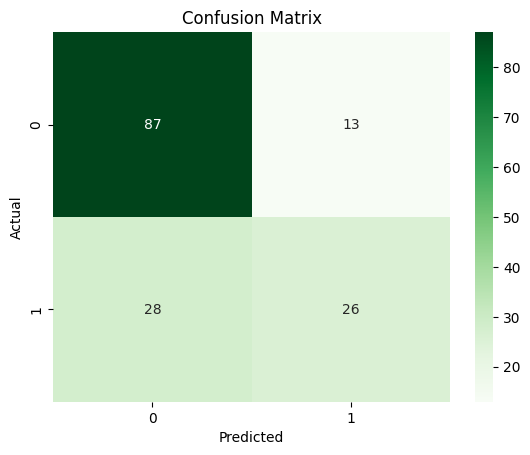

In [28]:
cf_matrix = confusion_matrix(Y_test, test_pred)
sns.heatmap(cf_matrix,annot=True,cmap='Greens', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
precision_train = precision_score(Y_train, train_pred)
precision_test = precision_score(Y_test, test_pred)

print("Training Precision:", precision_train)
print("Test Precision:", precision_test)

Training Precision: 0.75
Test Precision: 0.6666666666666666


In [30]:
recall_train = recall_score(Y_train,train_pred)
recall_test = recall_score(Y_test, test_pred)

print("Training Recall:", recall_train)
print("Test Recall:", recall_test)

Training Recall: 0.5887850467289719
Test Recall: 0.48148148148148145


In [31]:
f1_train = f1_score(Y_train, train_pred)
f1_test = f1_score(Y_test, test_pred)

print("Training F1 score:", f1_train)
print("Test F1 score:",f1_test)

Training F1 score: 0.6596858638743456
Test F1 score: 0.5591397849462365


In [33]:
def evaluate_model(y_true, y_pred, label=""):
    print(f"\nMetrics for {label} Data:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall :", recall_score(y_true, y_pred))
    print("F1 score:", f1_score(y_true, y_pred))  # Corrected here

evaluate_model(Y_train, train_pred, "Training")
evaluate_model(Y_test, test_pred, "Testing")



Metrics for Training Data:
Accuracy: 0.7879282218597063
Precision: 0.75
Recall : 0.5887850467289719
F1 score: 0.6596858638743456

Metrics for Testing Data:
Accuracy: 0.7337662337662337
Precision: 0.6666666666666666
Recall : 0.48148148148148145
F1 score: 0.5591397849462365
